- classification task
- 9 attributes, 1 categorical (trustLevel), other numerical
- false positive (-25), false negative (-5), true positive (+5)

some observation
- label is unbalanced
- scannedlineitempersecond, valuepersecondsome, itemvoidperposition distribution are skewed
- correlation to label is low
- scannedlineitempersecond highly correlate to valuepersecond

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from classifiers import *

In [2]:
train_data = pd.read_csv('data/train.csv', sep = '|')
test_data = pd.read_csv('data/test.csv', sep = '|')
print(f'Train set has {train_data.shape[0]} entries and {train_data.shape[1]} features')
print(f'Test set has {test_data.shape[0]} entries and {test_data.shape[1]} features')
print(f'attributes: \n {test_data.columns}')
# print(f'types: \n {train_data.dtypes}')

Train set has 1879 entries and 10 features
Test set has 498121 entries and 9 features
attributes: 
 Index(['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids',
       'scansWithoutRegistration', 'quantityModifications',
       'scannedLineItemsPerSecond', 'valuePerSecond',
       'lineItemVoidsPerPosition'],
      dtype='object')


In [3]:
# missing value check
for attribute in train_data.columns:
    print(f'{attribute} : {train_data[train_data[attribute].isna()==True].shape[0]} missing value')
    

trustLevel : 0 missing value
totalScanTimeInSeconds : 0 missing value
grandTotal : 0 missing value
lineItemVoids : 0 missing value
scansWithoutRegistration : 0 missing value
quantityModifications : 0 missing value
scannedLineItemsPerSecond : 0 missing value
valuePerSecond : 0 missing value
lineItemVoidsPerPosition : 0 missing value
fraud : 0 missing value


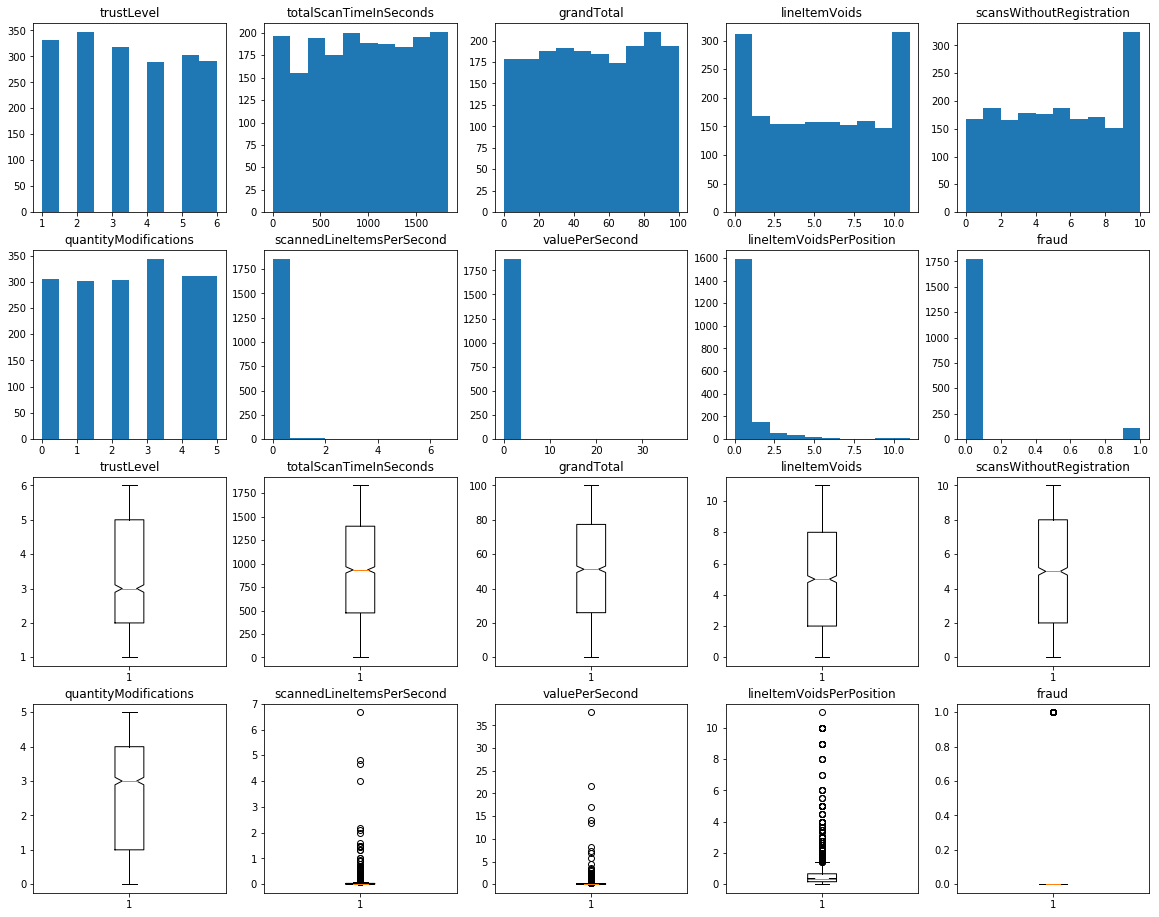

In [4]:
# histogram and boxplot
fig = plt.figure(figsize=(20,16))
ax = []
# histogram
for idx, attribute in enumerate(train_data.columns):
    ax.append(fig.add_subplot(4,5,idx+1))
    ax[idx].hist(train_data[attribute], bins=10)
    ax[idx].set_title(attribute)
    
# boxplot
# plt.boxplot(np.array(train_data), labels = train_data.columns)
for idx, attribute in enumerate(train_data.columns):   
    ax.append(fig.add_subplot(4,5,idx+11))
    ax[10+idx].boxplot(train_data[attribute], notch=True)
    ax[10+idx].set_title(attribute)

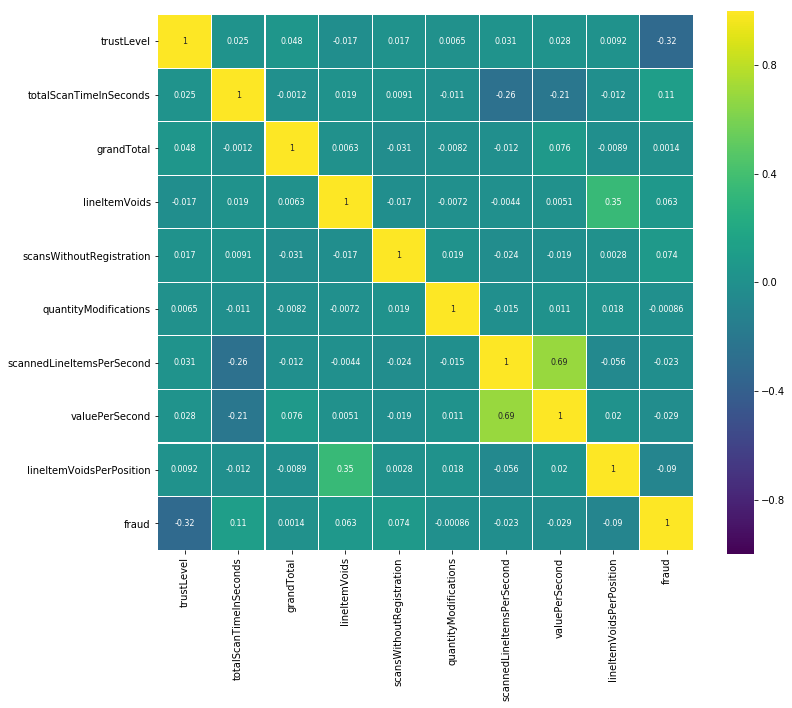

In [5]:
# correlation 
corr =train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [6]:
# encode category feature
trust_encode = pd.get_dummies(train_data['trustLevel'], prefix='trustLevel')

# normalize 
X = train_data.drop(columns=['trustLevel','fraud'])
col = X.columns 
y = train_data['fraud']
X = StandardScaler().fit_transform(X)
X = trust_encode.join(pd.DataFrame(X, columns=col), )
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

/Users/danihoff/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/danihoff/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [7]:
evaluate_classification(X, y)
# positive class is not predicted in Random Forest => should check balance labels

Naive Bayes: A=0.75 P=0.18 R=0.99 F1=0.31
K Nerest Neighbors: A=0.93 P=0.27 R=0.18 F1=0.22
Decision Tree: A=0.96 P=0.71 R=0.63 F1=0.66


/Users/danihoff/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/danihoff/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/danihoff/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/danihoff/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/danihoff/an

Neural Net: A=0.96 P=0.77 R=0.32 F1=0.44


/Users/danihoff/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/danihoff/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/danihoff/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/danihoff/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/danihoff/anaconda3/lib/python3.6/site

Random Forest: A=0.94 P=0.00 R=0.00 F1=0.00
AdaBoost: A=0.98 P=0.86 R=0.76 F1=0.81
XGBoost: A=0.98 P=0.87 R=0.70 F1=0.77
